In [79]:
#Gender Recognition by VOICE
#code
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('voice_train.csv')

In [80]:
df

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,3092,0.166738,0.052677,0.169427,0.162650,0.189223,0.026573,7.550412,76.134526,0.865282,...,0.166738,0.152651,0.022727,0.208333,0.174154,0.161133,0.214844,0.053711,0.136364,female
2847,1095,0.198718,0.058959,0.217333,0.143111,0.252000,0.108889,1.116666,3.569725,0.917123,...,0.198718,0.139322,0.050473,0.279070,0.792092,0.023438,4.968750,4.945312,0.155766,male
2848,1130,0.202333,0.063001,0.221946,0.137544,0.264817,0.127273,2.000371,6.681799,0.873847,...,0.202333,0.123610,0.047291,0.269663,1.190168,0.023438,7.429688,7.406250,0.093438,male
2849,1294,0.181799,0.058102,0.192037,0.123670,0.225568,0.101897,1.091660,4.009295,0.925575,...,0.181799,0.110586,0.049741,0.274286,0.789062,0.023438,4.359375,4.335938,0.062312,male


In [81]:
#Repalce "?"" with highest value from the column for number of doors
df['label'] = df['label'].map({'male':1, 'female':0})

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [83]:
df.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,...,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933,0.497720
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,...,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463,0.500083
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,...,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,...,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591,0.000000
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,...,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159,0.000000
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,...,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525,1.000000
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [84]:
#remove column ID 
df=df.drop(["Id"],axis=1)

In [85]:
 # Select all duplicate rows based on all columns
drows=df[df.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
print(drows)

All Duplicate Rows based on all columns are :
      meanfreq       sd    median       Q25       Q75       IQR      skew  \
827    0.21219  0.04319  0.215153  0.188957  0.245644  0.056687  1.862573   
2581   0.21219  0.04319  0.215153  0.188957  0.245644  0.056687  1.862573   

         kurt    sp.ent       sfm  ...  centroid   meanfun    minfun   maxfun  \
827   6.10979  0.877669  0.314398  ...   0.21219  0.139942  0.047198  0.27907   
2581  6.10979  0.877669  0.314398  ...   0.21219  0.139942  0.047198  0.27907   

       meandom    mindom     maxdom    dfrange   modindx  label  
827   1.925551  0.023438  15.609375  15.585938  0.121344      0  
2581  1.925551  0.023438  15.609375  15.585938  0.121344      0  

[2 rows x 21 columns]


In [86]:
df = df.drop(df.index[827])

In [87]:
 # Select all duplicate rows based on all columns
drows=df[df.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
print(drows)

All Duplicate Rows based on all columns are :
Empty DataFrame
Columns: [meanfreq, sd, median, Q25, Q75, IQR, skew, kurt, sp.ent, sfm, mode, centroid, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange, modindx, label]
Index: []

[0 rows x 21 columns]


In [88]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.62352617 0.06380411 0.3219942  ... 0.44945148 0.15573784 1.00421943]
 [0.64648709 0.01727956 0.43056376 ... 0.34401617 0.29400003 0.9957983 ]
 [0.52437904 0.28596244 1.40004302 ... 1.16252713 2.39313132 1.00421943]
 ...
 [0.71905425 0.3528762  1.00176278 ... 0.67815141 0.67398858 1.00421943]
 [0.02977557 0.05751494 0.17489086 ... 0.19418705 0.93454082 1.00421943]
 [0.44242941 0.5472529  0.3822248  ... 0.27860708 0.42330985 1.00421943]]


In [89]:
threshold = 3
print(np.where(z > 3))

(array([   3,    7,    7,    7,    7,   16,   16,   19,   19,   23,   23,
         33,   35,   43,   43,   48,   54,   56,   72,   74,   97,  111,
        115,  124,  125,  125,  126,  129,  132,  132,  135,  145,  145,
        145,  145,  165,  168,  168,  168,  168,  168,  196,  196,  214,
        225,  225,  237,  277,  277,  290,  290,  307,  323,  325,  328,
        328,  328,  328,  333,  333,  339,  339,  339,  339,  339,  347,
        347,  365,  369,  385,  389,  398,  410,  414,  426,  426,  435,
        436,  447,  466,  472,  476,  484,  489,  489,  489,  489,  490,
        507,  514,  514,  514,  514,  519,  528,  539,  539,  545,  547,
        555,  556,  559,  559,  559,  571,  571,  571,  571,  576,  585,
        588,  588,  606,  611,  615,  615,  622,  622,  649,  650,  650,
        654,  662,  662,  662,  662,  662,  670,  670,  673,  706,  711,
        712,  712,  725,  765,  765,  766,  766,  766,  766,  766,  767,
        770,  772,  772,  785,  786,  786,  786,  

In [90]:
df= df[(z < 3).all(axis=1)]

In [91]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,1
1,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,0
2,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,1
4,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,0
5,0.164700,0.075362,0.147018,0.118698,0.240475,0.121777,4.208608,43.681885,0.940669,0.604020,...,0.164700,0.082963,0.015640,0.253968,0.143353,0.007812,1.062500,1.054688,0.125926,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0.166738,0.052677,0.169427,0.162650,0.189223,0.026573,7.550412,76.134526,0.865282,0.427317,...,0.166738,0.152651,0.022727,0.208333,0.174154,0.161133,0.214844,0.053711,0.136364,0
2847,0.198718,0.058959,0.217333,0.143111,0.252000,0.108889,1.116666,3.569725,0.917123,0.363369,...,0.198718,0.139322,0.050473,0.279070,0.792092,0.023438,4.968750,4.945312,0.155766,1
2848,0.202333,0.063001,0.221946,0.137544,0.264817,0.127273,2.000371,6.681799,0.873847,0.261759,...,0.202333,0.123610,0.047291,0.269663,1.190168,0.023438,7.429688,7.406250,0.093438,1
2849,0.181799,0.058102,0.192037,0.123670,0.225568,0.101897,1.091660,4.009295,0.925575,0.427947,...,0.181799,0.110586,0.049741,0.274286,0.789062,0.023438,4.359375,4.335938,0.062312,1


In [92]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,...,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000
mean,0.183921,0.055912,0.189291,0.145180,0.226492,0.081312,2.406831,13.939673,0.896317,0.403391,...,0.183921,0.145055,0.036365,0.262918,0.864953,0.049958,5.269109,5.219151,0.164009,0.476684
std,0.026737,0.015835,0.031660,0.044075,0.021509,0.040541,1.395923,27.180538,0.043996,0.178191,...,0.026737,0.030209,0.015548,0.022592,0.496037,0.058943,3.122895,3.121812,0.089694,0.499556
min,0.097986,0.018363,0.077886,0.019935,0.154862,0.014922,0.141735,2.209673,0.766037,0.036876,...,0.097986,0.055565,0.009775,0.172043,0.020833,0.004883,0.117188,0.019531,0.021648,0.000000
25%,0.168052,0.040894,0.173537,0.119014,0.209955,0.041830,1.611482,5.490715,0.863358,0.253922,...,0.168052,0.121069,0.018605,0.258065,0.474609,0.007812,3.265625,3.234375,0.101648,0.000000
50%,0.186320,0.058516,0.191227,0.143343,0.227280,0.088935,2.118533,7.938203,0.902248,0.381716,...,0.186320,0.144159,0.046967,0.274286,0.807112,0.023438,5.273438,5.226562,0.138077,0.000000
75%,0.199759,0.065155,0.211868,0.176582,0.244465,0.113054,2.785813,12.627394,0.929765,0.528634,...,0.199759,0.169836,0.047904,0.277457,1.205125,0.054688,7.406250,7.359375,0.199507,1.000000
max,0.251124,0.096030,0.261224,0.247347,0.273469,0.195527,15.553404,414.846723,0.976533,0.826099,...,0.251124,0.231135,0.092593,0.279114,2.403783,0.234375,15.328125,15.304688,0.531381,1.000000


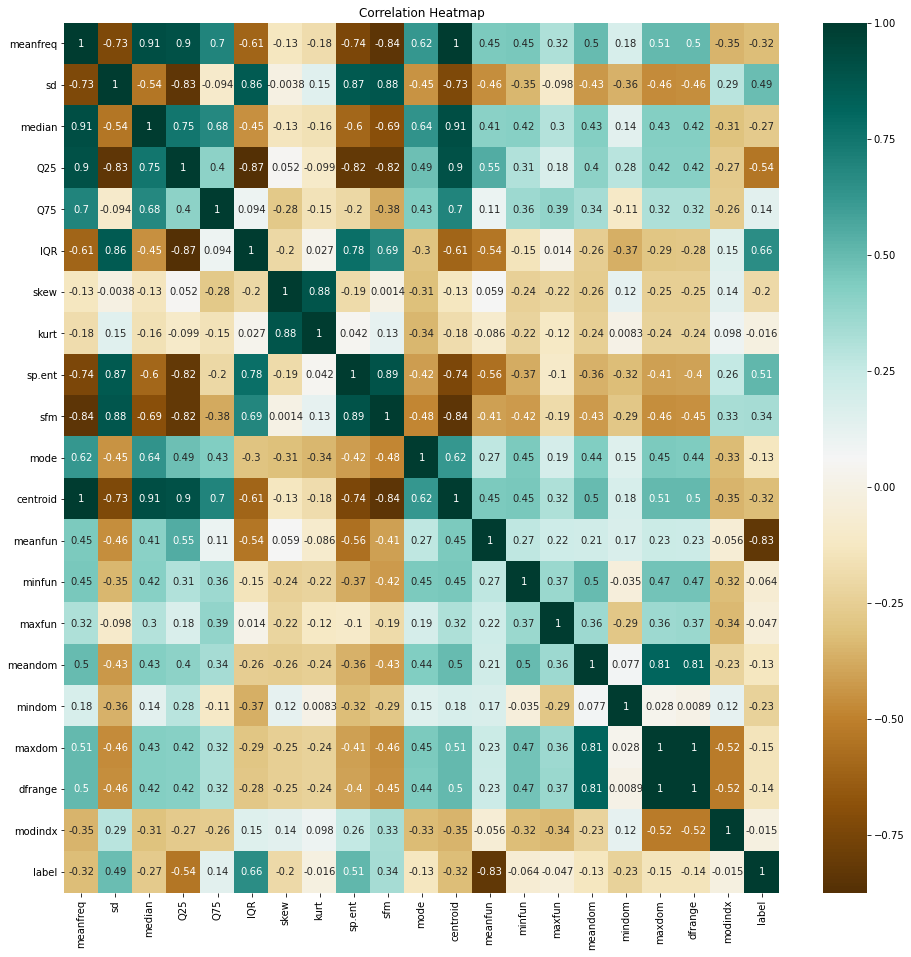

In [93]:
plt.figure(figsize = (16, 16))
sns_plot=sns.heatmap(df_voice.corr(), annot = True, cmap='BrBG')
fig = sns_plot.get_figure()
fig.savefig("output.png",dpi=300, bbox_inches='tight')
sns_plot.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=6);

In [94]:
#independent variables selected are 
#meanfun=-0.83, IQR=0.61,#Q25=-0.5,SP.ENT=0.35,sd=0.47,SFM=0.35,meanfreq=0.32,centroid=0.32
#centroid has 100% colinearity with meanfreq and hence dropped
#meanfreq has high corelation with #Q25 and hence dropped, SFM dropped for the same reason
#SD has high corel with IQR and hence dropped
#

In [95]:
selected_features=['meanfun','IQR','Q25','sp.ent','sd','sfm','meanfreq','centroid']

In [96]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df[selected_features], 
                                               df['label'], random_state=0)


In [97]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))


X_train shape: (1881, 8)
y_train shape: (1881,)
X_test shape: (628, 8)
y_test shape: (628,)


In [98]:
from sklearn.neighbors import KNeighborsClassifier

#Checking the accuracy of model for k=1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test score for k=1: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')

Test score for k=1: 96.0191%


In [99]:
#Using elbow method to find a good value of 'k' and thus improve the accuracy of the model
error_rate = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))

Text(0, 0.5, 'Error Rate')

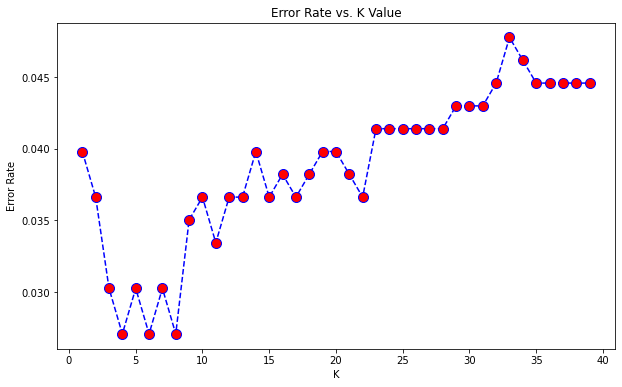

In [100]:
#plotting error_rate vs k
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [101]:
#from the graph it is clear that the optimum value of k occurs when the error is minimum
#so the value k = 3 will give maximum accuracy
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("Test score for k=3: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')
y_predict=knn.predict(X_test)

Test score for k=5: 96.9745%


In [104]:
y_predict

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [105]:
y_test

641     1
1472    1
1268    0
2072    1
448     1
       ..
515     0
568     1
912     0
1303    1
2803    0
Name: label, Length: 628, dtype: int64

In [110]:
from sklearn import metrics
# Predicted values
y_pred=y_predict
# Actual values
y_act = y_test
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=[1, 0]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=[1, 0]))


[[270   5]
 [ 14 339]]
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       275
           0       0.99      0.96      0.97       353

    accuracy                           0.97       628
   macro avg       0.97      0.97      0.97       628
weighted avg       0.97      0.97      0.97       628



In [123]:
df_test = pd.read_csv('voice_test.csv')

In [124]:
df_test

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,...,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,...,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,...,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,...,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,...,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,3085,0.161414,0.058721,0.168799,0.155354,0.187696,0.032343,6.983165,62.015963,0.883244,...,0.168799,0.161414,0.152409,0.018282,0.172414,0.187800,0.034180,0.683594,0.649414,0.062857
313,1632,0.196856,0.062991,0.214238,0.193520,0.229305,0.035785,3.540719,19.561051,0.894763,...,0.217691,0.196856,0.163254,0.016327,0.275862,0.419398,0.007812,5.289062,5.281250,0.087395
314,2893,0.208788,0.039871,0.200610,0.188232,0.239878,0.051646,2.429290,10.293602,0.860193,...,0.195061,0.208788,0.170176,0.047666,0.279070,1.677455,0.023438,7.125000,7.101562,0.173157
315,1106,0.185915,0.060364,0.197474,0.132632,0.237632,0.105000,0.905155,3.204754,0.934194,...,0.226579,0.185915,0.129221,0.046967,0.277457,1.024816,0.023438,5.320312,5.296875,0.154559


In [125]:
x_predict_test=df_test[selected_features]

In [126]:
y_predict_test=knn.predict(x_predict_test)

In [127]:
type(y_predict_test)

numpy.ndarray

In [128]:
df_final = pd.DataFrame(y_predict_test, columns = ['label'])

In [129]:
df_final

,label
0,0
1,1
2,1
3,0
4,0
...,...
312,0
313,0
314,0
315,1


In [130]:
df_temp=df_test['Id']

In [131]:
 df_final=pd.concat([df_temp,df_final],axis=1)

In [132]:
df_final

,Id,label
0,2148,0
1,1124,1
2,170,1
3,3158,0
4,2229,0
...,...,...
312,3085,0
313,1632,0
314,2893,0
315,1106,1


In [133]:
#Move to CSV for final predicted prices
df_final.to_csv('Predicted_final.csv',index=False, header=False)